# Latent Semantic Analysis (LSA)

Open in [Google Colab](https://colab.research.google.com/github/febse/ta2025/blob/main/02-05-Latent-Semantic-Analysis.ipynb)


In [1]:
import pandas as pd
import numpy as np
import re
import nltk

nltk.download('reuters')

from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

[nltk_data] Downloading package reuters to /home/amarov/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [2]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [3]:
# Extract the documents from the reuters corpus and organize them into texts and topics

gas_fileids = reuters.fileids(["gas"])
cpi_fileids = reuters.fileids(["cpi"])
coffee_fileids = reuters.fileids(["coffee"])

gas_text = reuters.raw(fileids=gas_fileids).split("\n\n")
cpi_text = reuters.raw(fileids=cpi_fileids).split("\n\n")
coffee_text = reuters.raw(fileids=coffee_fileids).split("\n\n")

texts = gas_text + cpi_text + coffee_text
topics = ["gas"] * len(gas_text) + ["cpi"] * len(cpi_text) + ["coffee"] * len(coffee_text)

len(texts)

316

In [4]:
for line in gas_text[0].split("\n")[:10]:
    print(line)

FINNS AND CANADIANS TO STUDY MTBE PRODUCTION PLANT
  Finland's national oil company Neste Oy
  &lt;NEOY.HE> said in a statement it had agreed with Canadian firms
  to study the feasibility of building a plant in Edmonton,
  Canada, to produce a replacement for lead in petrol.
      The prospective plant would cost an estimated 270 mln
  Canadian dlrs and would produce methyl tertiary butyl ether
  (MTBE) from raw materials available locally, it said.
      The partners in the study are Neste Oy, Celanese Canada
  Inc, Hoechst Celanese Corporation and Trade Mountain Pipe Line


In [5]:
for line in cpi_text[1].split("\n")[:10]:
    print(line)

INDONESIAN INFLATION RATE 8.8 PCT IN 1986/87
  Inflation was by 8.8 pct in Indonesia
  during fiscal 1986/87 to March 31, compared to 5.66 pct the
  previous year, Information Minister Harmoko said after a
  cabinet session to discuss the economic situation.
  


In [6]:
for line in coffee_text[2].split("\n")[:10]:
    print(line)

COFFEE COULD DROP TO 70/80 CTS, CARDENAS SAYS
  International coffee prices could drop to
  between 70 and 80 cents a lb by next October if no agreement is
  reached to support the market, Jorge Cardenas, manager of
  Colombia's National Coffee Growers' Federation said.
      Speaking at a forum for industrialists, he said one of the
  reasons was that the market was already saturated and that
  producers will have excess production and stockpiles of 39 mln
  (60-kg) bags in 1987.
      Today, May futures in New York settled at 107.90 cents a


In [8]:
# We will remove the numbers from the text, because here these are very common in every article and obfuscate
# the results

texts = [re.sub(r"\d+", "", text) for text in texts]

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    min_df=0.05
)
term_doc_matrix = tfidf.fit_transform(texts)

term_doc_df = pd.DataFrame(
    term_doc_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

## Should probably remove numbers
term_doc_df.head()

,according,account,added,agency,ago,agree,agreed,agreement,american,analysts,...,value,way,week,weekly,weeks,west,world,year,years,york
0,0.0,0.0,0.08941,0.000000,0.000000,0.0,0.125704,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.052933,0.0,0.0
1,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.00000,0.078835,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.174083,0.082240,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.00000,0.065468,0.167198,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.068296,0.068296,0.0,0.0,0.198380,0.0,0.0


In [9]:
term_doc_df.shape

(316, 272)

In [10]:
# Find the most frequent terms in the texts

term_frequencies = term_doc_df.sum().sort_values(ascending=False)
term_frequencies.head(10)

pct          44.838475
coffee       36.328980
said         34.097011
mln          27.898639
year         25.276107
february     19.854388
prices       17.748329
inflation    17.062796
january      14.397193
gasoline     13.580365
dtype: float64

## SVD of the Term-Document Matrix



Example terms-topic matrix: values indicate how strongly a word is related to a topic.

| Word/Topic | energy  | inflation   | coffee |
|------------|------|-------|--------|
| burn       | 1.43 | 0.022 | 0.34   |
| wage       | 0.14 | 2.01  | 0.25   |
| harvest    | 0.35 | 0.21  | 1.12   |

Example document-topic matrix: the values in this matrix indicate how strongly
a document is related to a topic.

| Document/Topic | energy  | inflation   | coffee |
|----------------|---------|-------------|--------|
| Doc1 (energy)  | 1.43    | 0.01        | 0.21   |
| Doc2 (inflation) | 0.14  | 2           | 0.25   |
| Doc3 (coffee)  | 0.38    | 0.21        | 1.17   |

The singular values indicate how strongly a topic contributes to explaining
the data (term-document frequencies).

| Topic   | singular value |
|---------|----------------|
| energy  | 3.2            |
| inflation | 2.3          |
| coffee  | 1.02           |
| other   | 0.1            |

In [12]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=3, n_iter=100, random_state=42)
lsa_result = lsa.fit_transform(term_doc_matrix)
Sigma = lsa.singular_values_
V_T = lsa.components_.T
# V_T

<Axes: >

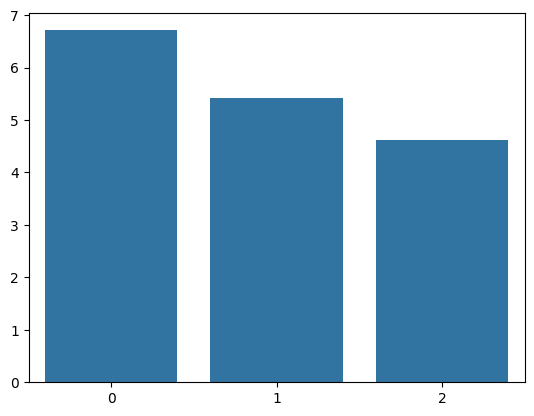

In [13]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [14]:
term_topic_matrix = pd.DataFrame(data=V_T,
                                 index=term_doc_df.columns,
                                 columns = [f'Component {r}' for r in range(0,V_T.shape[1])])
term_topic_matrix

,Component 0,Component 1,Component 2
according,0.015200,0.017137,0.001682
account,0.017155,0.007464,0.001732
added,0.040728,0.028282,0.001246
agency,0.021071,0.005884,0.017195
ago,0.048226,-0.014605,0.017285
...,...,...,...
west,0.025085,0.004595,-0.003680
world,0.038500,0.048391,-0.016663
year,0.265828,-0.082037,0.010392
years,0.028403,0.010104,-0.000518


In [16]:
import plotly.graph_objs as go
import pandas as pd

# Define a discrete color palette (e.g., Plotly's qualitative palette)
discrete_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
unique_topics = list(dict.fromkeys(topics))  # preserve order
color_map = {topic: discrete_colors[i % len(discrete_colors)] for i, topic in enumerate(unique_topics)}
marker_colors = [color_map[t] for t in topics]

trace = go.Scatter3d(
    x=lsa_result[:, 0],
    y=lsa_result[:, 1],
    z=lsa_result[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=marker_colors,
        opacity=0.8,
        line=dict(width=0.5, color='black')
    ),
    text=topics
)

# Create a custom legend
legend_traces = [
    go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='markers',
        marker=dict(size=8, color=color_map[topic]),
        name=topic
    ) for topic in unique_topics
]

layout = go.Layout(
    title='Documents in 3D SVD Component Space',
    scene=dict(
        xaxis_title='Component 0',
        yaxis_title='Component 1',
        zaxis_title='Component 2'
    ),
    legend=dict(itemsizing='constant'),
    width=800,
    height=800
)

fig_plotly = go.Figure(data=[trace] + legend_traces, layout=layout)
fig_plotly.show()